# Comprehensive annotations

In [1]:
import time
time.ctime()

'Sat Jan 25 21:54:25 2025'

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt; plt.rcParams['pdf.fonttype'] = 42

In [3]:
import yaml
with open('config.yaml', 'rt') as f:
    dctConfig = yaml.load(f, Loader=yaml.FullLoader)
dctConfig

{'samples': {'ID': ['WT', 'Casette', 'OriLyt', 'delNucFoci', 'delCLIP'],
  'read_length': {'read1': 151, 'read2': 151}},
 'reference_info': {'genome_aligner': 'star',
  'genome_assembly': 'GRCh38',
  'chrom_sizes': 'https://hgdownload2.soe.ucsc.edu/goldenPath/hg38/bigZips/p14/hg38.p14.chrom.sizes',
  'reference_fasta': 'https://ftp.ebi.ac.uk/pub/databases/gencode/Gencode_human/release_45/GRCh38.primary_assembly.genome.fa.gz',
  'reference_gtf': 'https://ftp.ebi.ac.uk/pub/databases/gencode/Gencode_human/release_45/gencode.v45.primary_assembly.annotation.gff3.gz',
  'transcriptome_fasta': 'https://ftp.ebi.ac.uk/pub/databases/gencode/Gencode_human/release_45/gencode.v45.transcripts.fa.gz',
  'viral_genome_assembly': 'HCMV_Toledo.fa',
  'viral_genome_gtf': 'HCMV_Toledo.gff3',
  'kmer_size': 12,
  'max_mismatch': 0.1},
 'annotations': {'species': 'Homo sapiens',
  'genome_assembly': 'GRCh38',
  'sources': {'GENCODE': 'https://hgdownload2.soe.ucsc.edu/goldenPath/hg38/database/wgEncodeGencode

## 1. Load dataframe

In [34]:
dfCounts = pd.read_table('../data/processed/summary-stats/all.annotations.count.txt', index_col=0)
dfCounts.rename(index={'RNA': '7SK'}, inplace=True)
dfCounts = dfCounts.T
dfCounts.fillna(0, inplace=True)
dfCounts = dfCounts.astype(int)
dfCounts = dfCounts.T

# dfCounts.loc['unmapped'] = dfCounts.loc['all'] \
#                             - dfCounts.loc['host'] \
#                             - dfCounts.loc['virus'] \
                            # - dfCounts.loc['chimeric']

dfCounts.loc['filtered_out'] = dfCounts.loc['all'] - dfCounts.loc['trimmed']

dfCounts.loc['unannotated'] = dfCounts.loc['host'] \
                            - dfCounts.loc['annotated'] \
#                             - dfCounts.loc['spike_in'] \
#                             - dfCounts.loc['unmapped']

In [35]:
dfCounts.sort_values(by=list(dfCounts.columns)[1], ascending=False)

,Casette,delCLIP,OriLyt,WT,delNucFoci
all,24316537,20754468,19111174,23138020,21471930
trimmed,23878956,20453327,18790609,22643410,21107364
virus,18772883,19834331,17270368,22020623,20657719
host,4586050,419058,1227631,218159,177933
annotated,4003289,363985,1078122,190411,155722
filtered_out,437581,301141,320565,494610,364566
discordant,520023,199938,292610,404628,271712
LINE,1321308,122798,348642,58862,47991
SINE,935184,80798,259848,42188,37064
intron,683336,59930,185158,30133,27119


## 2. Make percent dataframe

In [36]:
dfPercent = dfCounts.drop(['host', 'annotated', 'trimmed'], axis=0)
# dfPercent#.sum(axis=0)

In [37]:
dfPercent = dfPercent * 100 / dfPercent.loc['all']
dfPercent.sum()

Casette       200.346896
delCLIP       200.011376
OriLyt        200.017639
WT            200.002273
delNucFoci    200.002948
dtype: float64

In [38]:
dfPercent.drop('all', inplace=True)

## 3. Plot

In [39]:
dfPercent.sort_values(list(dfPercent.columns)[1], ascending=False, inplace=True)

In [40]:
dfPercent

,Casette,delCLIP,OriLyt,WT,delNucFoci
virus,77.202124,95.566559,90.367907,95.170732,96.208021
filtered_out,1.799520,1.450969,1.677369,2.137650,1.697873
discordant,2.138557,0.963349,1.531094,1.748758,1.265429
LINE,5.433784,0.591670,1.824284,0.254395,0.223506
SINE,3.845877,0.389304,1.359665,0.182332,0.172616
intron,2.810170,0.288757,0.968847,0.130232,0.126300
unannotated,2.396562,0.265355,0.782312,0.119924,0.103442
LTR,1.604608,0.174232,0.543713,0.079134,0.071410
DNA,0.721316,0.076610,0.247353,0.034143,0.032126
Satellite,0.556202,0.071570,0.161649,0.032565,0.025661


In [41]:
dfPercent.sum()

Casette       100.346896
delCLIP       100.011376
OriLyt        100.017639
WT            100.002273
delNucFoci    100.002948
dtype: float64

In [42]:
dfPercent = dfPercent.sort_index(axis=1)
required = ['filtered_out', 'unmapped', 'virus', 'unannotated', 'discordant']
dfPercent = pd.concat([
    dfPercent.loc[required],
    dfPercent.loc[list(
        set(list(dfPercent.index)) - set(required)
    )].sort_values(list(dfPercent.columns)[1], ascending=False)
])

In [44]:
dfPercent.columns

Index(['Casette', 'OriLyt', 'WT', 'delCLIP', 'delNucFoci'], dtype='object')

In [45]:
dfPercent.columns = ['OriLyt + Selection Casette', 'OriLyt', 'WT', 'ΔCLIP region', 'Δ3-4kb']
dfPercent = dfPercent[['WT', 'OriLyt + Selection Casette', 'OriLyt', 'Δ3-4kb', 'ΔCLIP region']].copy()

In [46]:
myTabColors = np.vstack([plt.cm.tab10(np.arange(10)), plt.cm.tab20(range(1, 20, 2))])

Text(0, 0.5, 'Percent (%)')

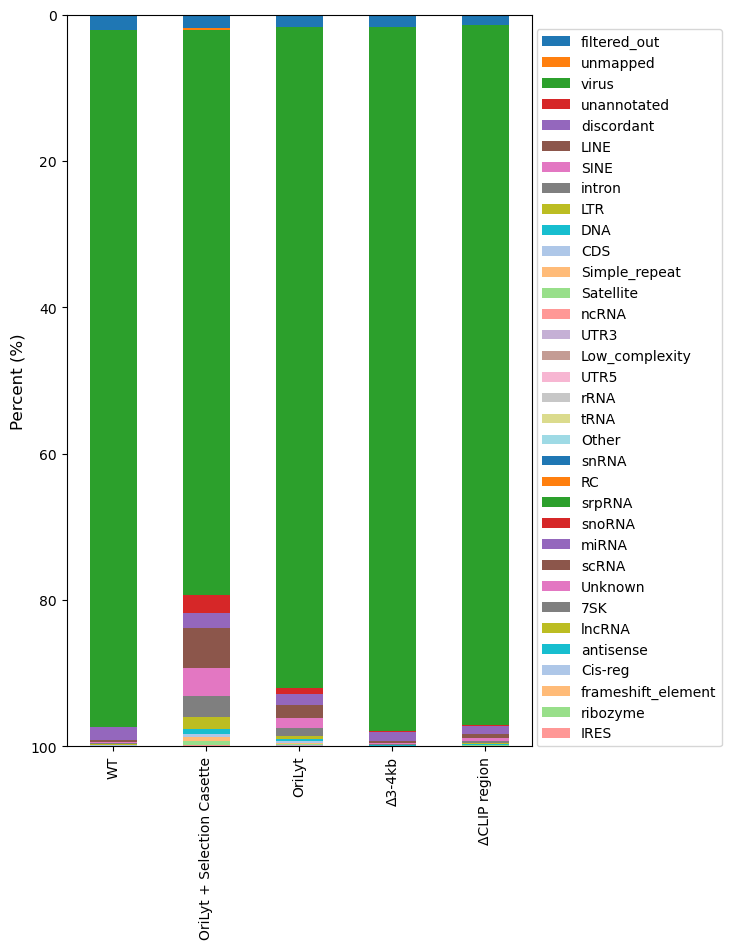

In [47]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 9.5))
dfPercent.transpose().plot(kind='bar', stacked=True, ax=ax, color=myTabColors)
ax.set_ylim([0,100])
ax.invert_yaxis()
ax.legend(loc=(1.01,0))
ax.set_ylabel('Percent (%)', fontsize='large')
# plt.savefig('small RNA-seq reads annotation type (percent).png', format='png', dpi=600, bbox_inches='tight')

***

In [15]:
dfPercent.loc['Misc'] = dfPercent.iloc[13:].sum()
dfExport = pd.concat([dfPercent.iloc[:13], dfPercent.loc[['Misc']]], axis=0)
dfExport

,Casette,OriLyt,WT,delCLIP,delNucFoci
filtered_out,1.799520,1.677369,2.137650,1.450969,1.697873
unmapped,0.346896,0.017639,0.002273,0.011376,0.002948
virus,77.202124,90.367907,95.170732,95.566559,96.208021
unannotated,2.396562,0.782312,0.119924,0.265355,0.103442
discordant,2.138557,1.531094,1.748758,0.963349,1.265429
LINE,5.433784,1.824284,0.254395,0.591670,0.223506
SINE,3.845877,1.359665,0.182332,0.389304,0.172616
intron,2.810170,0.968847,0.130232,0.288757,0.126300
LTR,1.604608,0.543713,0.079134,0.174232,0.071410
DNA,0.721316,0.247353,0.034143,0.076610,0.032126


***

## 1. Load dataframe

In [16]:
dfCounts = pd.read_table('../data/processed/summary-stats/all.annotations.count.txt', index_col=0)
dfCounts.rename(index={'RNA': '7SK'}, inplace=True)
dfCounts = dfCounts.T
dfCounts.fillna(0, inplace=True)
dfCounts = dfCounts.astype(int)
dfCounts = dfCounts.T

# dfCounts.loc['unmapped'] = dfCounts.loc['all'] \
#                             - dfCounts.loc['host'] \
#                             - dfCounts.loc['virus'] \
                            # - dfCounts.loc['chimeric']

dfCounts.loc['filtered_out'] = dfCounts.loc['all'] - dfCounts.loc['trimmed']

dfCounts.loc['unannotated'] = dfCounts.loc['host'] \
                            - dfCounts.loc['annotated'] \
#                             - dfCounts.loc['spike_in'] \
#                             - dfCounts.loc['unmapped']

In [17]:
dfCounts.sort_values(by=list(dfCounts.columns)[1], ascending=False)

,Casette,delCLIP,OriLyt,WT,delNucFoci
all,24316537,20754468,19111174,23138020,21471930
trimmed,23878956,20453327,18790609,22643410,21107364
virus,18772883,19834331,17270368,22020623,20657719
host,4586050,419058,1227631,218159,177933
annotated,4003289,363985,1078122,190411,155722
filtered_out,437581,301141,320565,494610,364566
discordant,520023,199938,292610,404628,271712
LINE,1321308,122798,348642,58862,47991
SINE,935184,80798,259848,42188,37064
intron,683336,59930,185158,30133,27119


## 2. Make percent dataframe

In [18]:
dfPercent = dfCounts.drop(
    ['host', 'annotated', 'all', 'filtered_out', 'trimmed', 'unmapped', 'discordant'], axis=0
)
dfPercent = dfPercent / dfPercent.sum(axis=0) * 100
dfPercent.sum()

Casette       100.0
delCLIP       100.0
OriLyt        100.0
WT            100.0
delNucFoci    100.0
dtype: float64

In [19]:
# dfPercent.columns = ['_'.join(col.split('_')[1:]) for col in dfPercent.columns]
# dfPercent.columns = [col.replace('SMI', 'Input') if 'SMI' in col else f"CLIP_{col}" for col in dfPercent.columns]
dfPercent = dfPercent.sort_index(axis=1)

## 3. Plot

In [20]:
dfPercent.sort_values(list(dfPercent.columns)[1], ascending=False, inplace=True)

In [21]:
dfPercent

,Casette,OriLyt,WT,delCLIP,delNucFoci
virus,80.367040,93.363439,99.019016,97.930924,99.146017
LINE,5.656543,1.884755,0.264682,0.606308,0.230331
SINE,4.003539,1.404736,0.189705,0.398936,0.177887
intron,2.925373,1.000962,0.135498,0.295901,0.130157
unannotated,2.494810,0.808244,0.124773,0.271920,0.106601
LTR,1.670389,0.561736,0.082334,0.178543,0.073590
DNA,0.750886,0.255552,0.035524,0.078505,0.033107
CDS,0.458488,0.172105,0.040164,0.048199,0.023407
Simple_repeat,0.509150,0.171592,0.030519,0.055887,0.024549
Satellite,0.579003,0.167007,0.033882,0.073341,0.026445


In [22]:
dfPercent.sum()

Casette       100.0
OriLyt        100.0
WT            100.0
delCLIP       100.0
delNucFoci    100.0
dtype: float64

In [23]:
dfPercent = dfPercent.sort_index(axis=1)
required = ['virus']
dfPercent = pd.concat([
    dfPercent.loc[required],
    dfPercent.loc[list(
        set(list(dfPercent.index)) - set(required)
    )].sort_values(list(dfPercent.columns)[1], ascending=False)
])

In [24]:
myTabColors = np.vstack([plt.cm.tab10(np.arange(10)), plt.cm.tab20(range(1, 20, 2))])

Text(0, 0.5, 'Percent (%)')

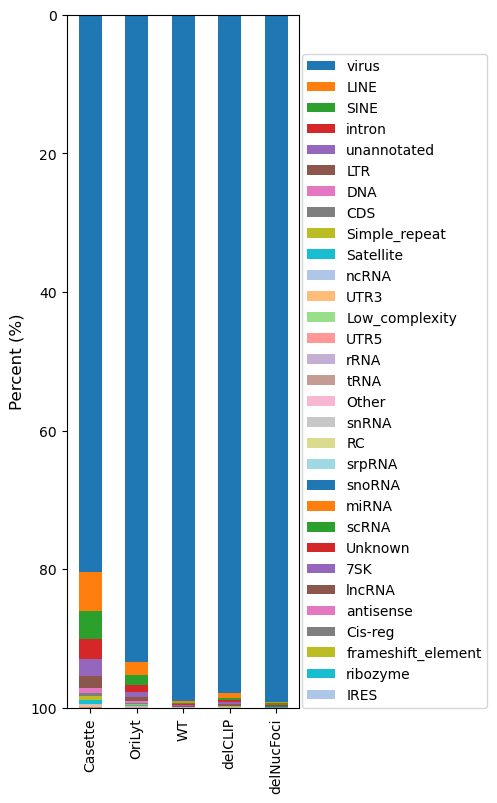

In [25]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(3, 9))
dfPercent.transpose().plot(kind='bar', stacked=True, ax=ax, color=myTabColors)
ax.set_ylim([0,100])
ax.invert_yaxis()
ax.legend(loc=(1.01,0))
ax.set_ylabel('Percent (%)', fontsize='large')
# plt.savefig('small RNA-seq reads annotation type (percent).png', format='png', dpi=600, bbox_inches='tight')

***

In [26]:
dfPercent.loc['Misc'] = dfPercent.iloc[6:].sum()
dfExport = pd.concat([dfPercent.iloc[:6], dfPercent.loc[['Misc']]], axis=0)
dfExport

,Casette,OriLyt,WT,delCLIP,delNucFoci
virus,80.367040,93.363439,99.019016,97.930924,99.146017
LINE,5.656543,1.884755,0.264682,0.606308,0.230331
SINE,4.003539,1.404736,0.189705,0.398936,0.177887
intron,2.925373,1.000962,0.135498,0.295901,0.130157
unannotated,2.494810,0.808244,0.124773,0.271920,0.106601
LTR,1.670389,0.561736,0.082334,0.178543,0.073590
Misc,2.882306,0.976127,0.183994,0.317468,0.135417


In [27]:
# dfExport.to_csv('../data/tables/annotation_type_percent.txt', sep='\t')

In [28]:
dfExport.cumsum()

,Casette,OriLyt,WT,delCLIP,delNucFoci
virus,80.367040,93.363439,99.019016,97.930924,99.146017
LINE,86.023582,95.248194,99.283697,98.537232,99.376348
SINE,90.027122,96.652930,99.473402,98.936168,99.554235
intron,92.952495,97.653892,99.608899,99.232069,99.684392
unannotated,95.447305,98.462136,99.733672,99.503989,99.790993
LTR,97.117694,99.023873,99.816006,99.682532,99.864583
Misc,100.000000,100.000000,100.000000,100.000000,100.000000


In [29]:
myTabColors = plt.cm.Set1(range(9))

In [31]:
dfExport.columns = ['OriLyt + Selection Casette', 'OriLyt', 'WT', 'ΔCLIP region', 'Δ3-4kb']
dfExport = dfExport[['WT', 'OriLyt + Selection Casette', 'OriLyt', 'Δ3-4kb', 'ΔCLIP region']].copy()

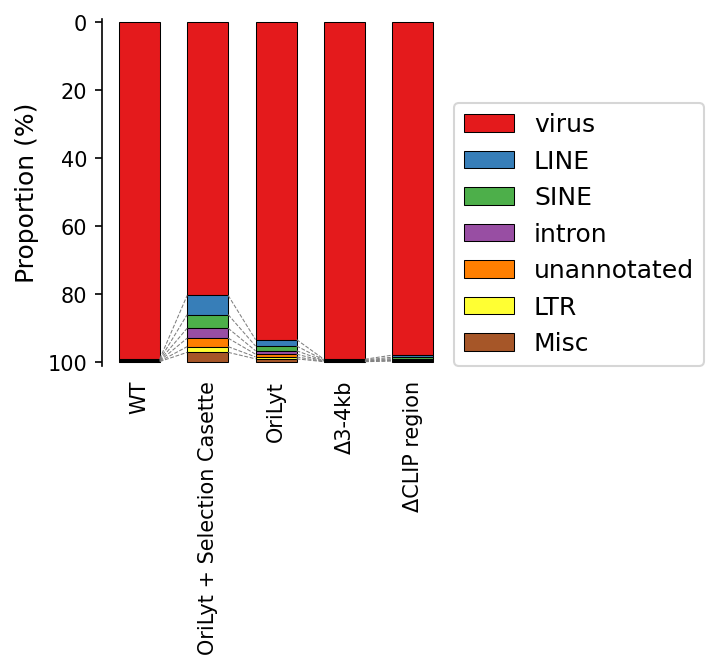

In [33]:
BAR_WIDTH = 0.6

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(3, 3), facecolor='white', dpi=150)

dfExport.transpose().plot(kind='bar', stacked=True, ax=ax, color=myTabColors, width=BAR_WIDTH, edgecolor='black', linewidth=0.5)
ax.set_ylim([-1,101])
ax.invert_yaxis()
# legend box size decreasing
ax.legend(loc=(1.01,0), fontsize='large')
ax.set_ylabel('Proportion (%)', fontsize='large')

# remove spines
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)

# remove ticks
ax.tick_params(axis='x', which='both', bottom=False, top=False)

# connect each element in the bar plot with the same element in the next bar plot
y_coords = dfExport.cumsum()
for s in range(dfExport.shape[1] - 1):
    for y in range(dfExport.shape[0] - 1):
        ax.plot(
            [s + BAR_WIDTH / 2, s + 1 - BAR_WIDTH / 2],
            y_coords.iloc[y, s:s + 2],
            color='gray', linestyle='--', linewidth=0.5
        )

plt.savefig('../data/results/read-proportion.pdf', format='pdf', bbox_inches='tight')
plt.savefig('../data/results/read-proportion.png', format='png', dpi=150, bbox_inches='tight')

In [203]:
y_coords.iloc[y, s:s + 2].to_numpy()

array([4.44088751])